# RGB特徴空間の表示

In [12]:
import cv2
import matplotlib.pyplot as plt

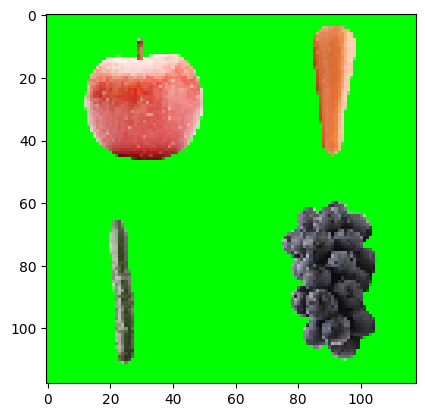

In [13]:
img_path = "fruits/gb_fruits.jpg"
img = cv2.imread(img_path)
# img = img[:int(img.shape[0]*0.5), :int(img.shape[1]*0.5)]
img = cv2.resize(img, None, fx=0.05, fy=0.05)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

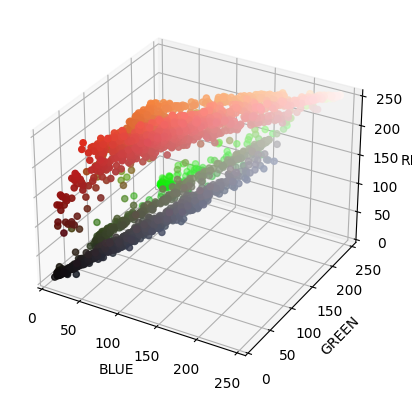

In [14]:
fig = plt.figure()
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb = rgb / 255
rgb = rgb.reshape((-1, 3))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel("BLUE")
ax.set_ylabel("GREEN")
ax.set_zlabel("RED")

ax.scatter(img[:, :, 0], img[:, :, 1], img[:, :, 2], c=rgb)
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])

plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn import mixture
import numpy as np

In [31]:
def label_img(label, img_shape, n):
    label = label.reshape(img_shape[:2])
    dst = np.zeros(img_shape)
    for i in range(n):
        color = np.random.randint(0, 255, (3)).astype(np.int8)
        print(color, i)
        dst[label == i] = color
    return dst

### k-means

/home/redpanda/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


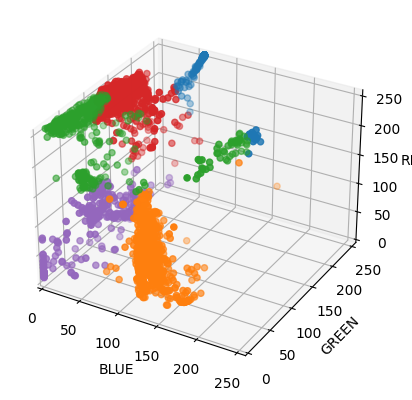

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-125   -7 -101] 0
[-51  63 119] 1
[-83 -10 115] 2
[  -4   17 -104] 3
[  90   68 -117] 4


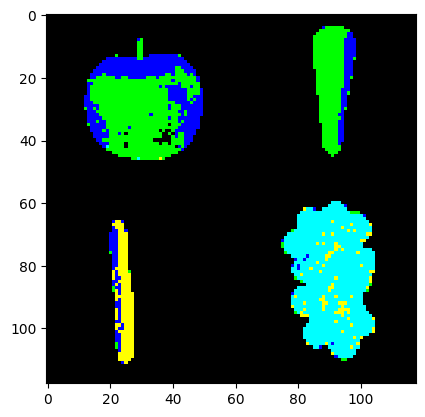

In [32]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=10)
data = img.reshape(-1, 3)
label = km.fit_predict(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter3D(data[:, 0][label==i], data[:, 1][label==i], data[:, 2][label==i])

ax.set_xlabel("BLUE")
ax.set_ylabel("GREEN")
ax.set_zlabel("RED")
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])
plt.show()
dst = label_img(label, img.shape, n_clusters)
plt.imshow(dst)

### GMM

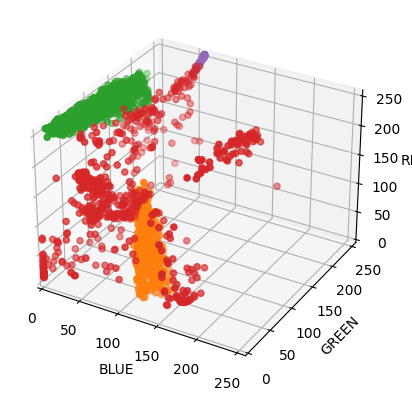

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-6 63 13] 0
[ 87 -38  28] 1
[-32 113 -25] 2
[  9  14 127] 3
[111 121  74] 4


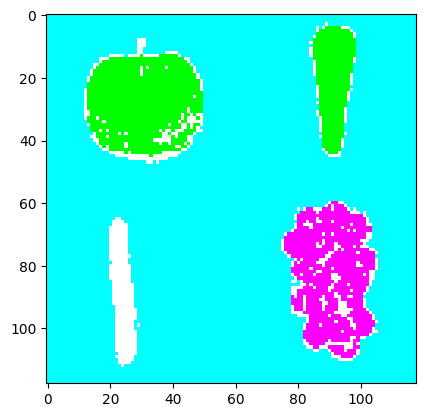

In [36]:
n_components = 5
gmm=mixture.GaussianMixture(n_components=n_components,covariance_type='full', random_state=10)
z_gmm=gmm.fit(data)
label=z_gmm.predict(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_components):
    ax.scatter3D(data[:, 0][label==i], data[:, 1][label==i], data[:, 2][label==i])

ax.set_xlabel("BLUE")
ax.set_ylabel("GREEN")
ax.set_zlabel("RED")
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])
plt.show()
dst = label_img(label, img.shape, n_clusters)
plt.imshow(dst)

## HSVで比較

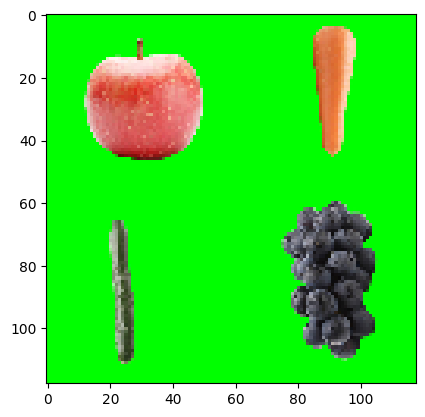

In [18]:
img = cv2.imread(img_path)
# img = img[:int(img.shape[0]*0.5), :int(img.shape[1]*0.5)]
img = cv2.resize(img, None, fx=0.05, fy=0.05)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))
plt.show()


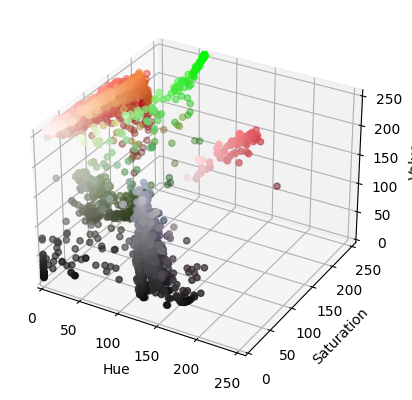

In [39]:
fig = plt.figure()
rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
rgb = rgb / 255
rgb = rgb.reshape((-1, 3))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")

ax.scatter(img[:, :, 0], img[:, :, 1], img[:, :, 2], c=rgb)
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])

plt.show()

### kmeans

/home/redpanda/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


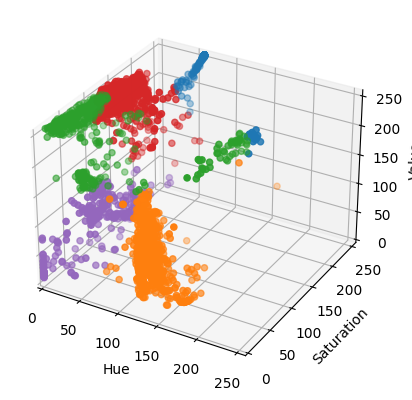

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ -73   12 -106] 0
[ 95  48 -73] 1
[ 95 -49  30] 2
[ 31 -64 103] 3
[  92  -40 -121] 4


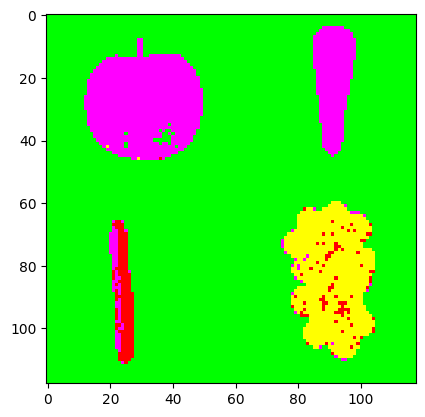

In [38]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=10)
data = img.reshape(-1, 3)
label = km.fit_predict(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter3D(data[:, 0][label==i], data[:, 1][label==i], data[:, 2][label==i])

ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])
plt.show()
dst = label_img(label, img.shape, n_clusters)
plt.imshow(dst)

### GMM

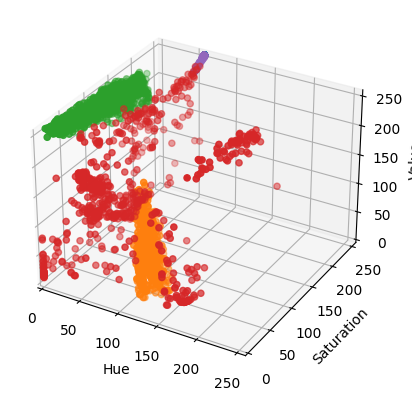

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 48 -94  12] 0
[28  8  6] 1
[ 50  72 119] 2
[-122   53  -35] 3
[-78 -91   8] 4


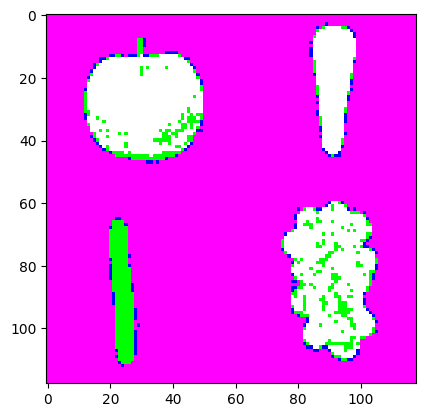

In [41]:
n_components = 5
gmm=mixture.GaussianMixture(n_components=n_components,covariance_type='full', random_state=10)
z_gmm=gmm.fit(data)
label=z_gmm.predict(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_components):
    ax.scatter3D(data[:, 0][label==i], data[:, 1][label==i], data[:, 2][label==i])

ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])
plt.show()
dst = label_img(label, img.shape, n_clusters)
plt.imshow(dst)